In [2]:
import pandas as pd
print("Notebook is working! 🎉")

Notebook is working! 🎉


In [16]:
df = pd.read_csv("../data/train.csv")
test = pd.read_csv("../data/test.csv")

In [6]:
# Quick look
print(df.shape)
df.head()

(18524, 9)


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [9]:
# Target distribution
print(df['Personality'].value_counts(normalize=True))

Personality
Extrovert    0.739527
Introvert    0.260473
Name: proportion, dtype: float64


In [10]:
# Missing values
print(df.isnull().sum())

id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


In [ ]:
# Data types
print(df.dtypes)

id                             int64
Time_spent_Alone             float64
Stage_fear                    object
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing     object
Friends_circle_size          float64
Post_frequency               float64
Personality                   object
dtype: object


In [ ]:
# Summary statistics
df.describe()

,id,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,18524.000000,17334.000000,17344.000000,17058.000000,17470.000000,17260.000000
mean,9261.500000,3.137764,5.265106,4.044319,7.996737,4.982097
std,5347.562529,3.003786,2.753359,2.062580,4.223484,2.879139
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4630.750000,1.000000,3.000000,3.000000,5.000000,3.000000
50%,9261.500000,2.000000,5.000000,4.000000,8.000000,5.000000
75%,13892.250000,4.000000,8.000000,6.000000,12.000000,7.000000
max,18523.000000,11.000000,10.000000,7.000000,15.000000,10.000000


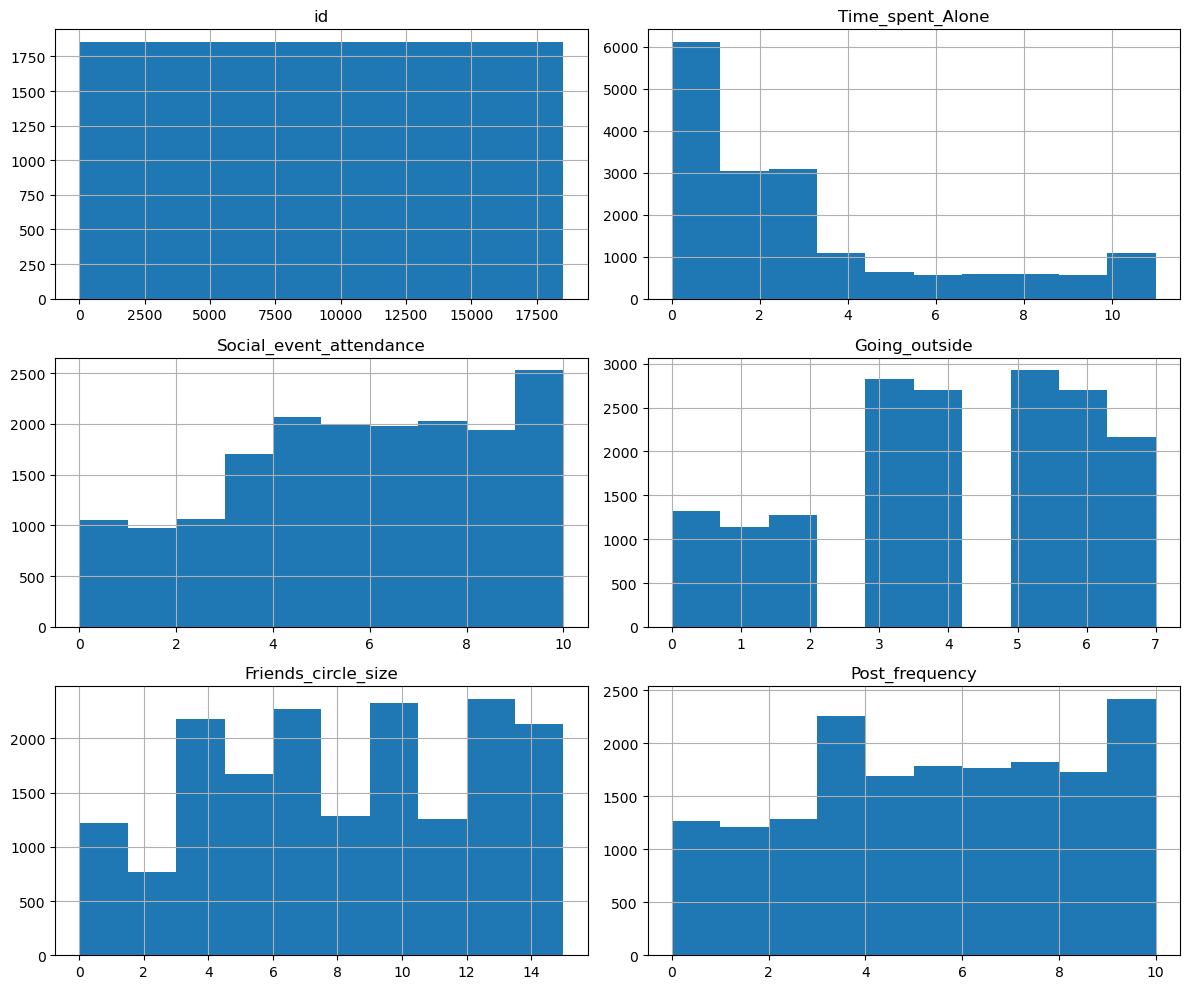

In [13]:
# Histograms for numerical features
import matplotlib.pyplot as plt
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

In [ ]:
# Drop rows with any missing values
df_clean = df.dropna()

# Confirm it's cleaned
print(f"Original shape: {df.shape}")
print(f"After dropping missing values: {df_clean.shape}")
#will need to rethink this as test is contains missing values


Original shape: (18524, 9)
After dropping missing values: (10189, 9)


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Features and target
X = df_clean.drop(columns=['Personality'])  # Replace with actual target column
y = df_clean['Personality']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Baseline model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

   Extrovert       0.98      0.98      0.98      2106
   Introvert       0.92      0.89      0.91       442

    accuracy                           0.97      2548
   macro avg       0.95      0.94      0.94      2548
weighted avg       0.97      0.97      0.97      2548



c:\Users\tajbo\anaconda3\envs\datascience_base\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency
0,18524,3.0,No,7.0,4.0,No,6.0,NaN
1,18525,NaN,Yes,0.0,0.0,Yes,5.0,1.0
2,18526,3.0,No,5.0,6.0,No,15.0,9.0
3,18527,3.0,No,4.0,4.0,No,5.0,6.0
4,18528,9.0,Yes,1.0,2.0,Yes,1.0,1.0
